In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neo
from pathlib import Path

In [2]:
data_dir = Path(r'R:\home\firefly_link\468_patch_clamp')
files = Path(data_dir).glob("./**/*.smr")
smr_names = [str(f) for f in files]
dates = []
slips = []
cells = []
trial_string = []
df = pd.DataFrame()
df['SMR_file'] = smr_names

for data in df.itertuples():
    s = data.SMR_file

    par = Path(s).parts

    dates.append(int(par[par.index("468_patch_clamp") + 1][-8:]))
    
    slips.append(s[s.find("slip") + len("slip") : s.find("slip") + len("slip") + 1])

    cells.append(s[s.find("cell") + len("cell") : s.find("cell") + len("cell") + 1])
   
    trial_string.append("_".join(Path(s).parts[Path(s).parts.index("468_patch_clamp") : -1]))
df["date"] = dates
df["slip"] = slips
df["cell"] = cells
df["trial_string"] = trial_string
df = df[df['date']>20231005]
expt = []
for data in df.itertuples():
    s=data.SMR_file
    if 'ttx' in s.lower():
        expt.append('ttx')
    else:
        expt.append('none')
df['expt'] = expt
df['use'] = 'y'
#df.to_csv(Path(data_dir,'dataframes','patch468_20231107.csv'))
df

,SMR_file,date,slip,cell,trial_string,expt,use
38,R:\home\firefly_link\468_patch_clamp\20231024\...,20231024,1,1,468_patch_clamp_20231024_slip1_cell1,none,y
39,R:\home\firefly_link\468_patch_clamp\20231024\...,20231024,1,1,468_patch_clamp_20231024_slip1_cell1,none,y
40,R:\home\firefly_link\468_patch_clamp\20231024\...,20231024,2,1,468_patch_clamp_20231024_slip2_cell1,none,y
41,R:\home\firefly_link\468_patch_clamp\20231024\...,20231024,3,1,468_patch_clamp_20231024_slip3_cell1,none,y
42,R:\home\firefly_link\468_patch_clamp\20231024\...,20231024,4,1,468_patch_clamp_20231024_slip4_cell1,none,y
43,R:\home\firefly_link\468_patch_clamp\20231025\...,20231025,1,1,468_patch_clamp_20231025_slip1_cell1,none,y
44,R:\home\firefly_link\468_patch_clamp\20231025\...,20231025,2,1,468_patch_clamp_20231025_slip2_cell1,none,y
45,R:\home\firefly_link\468_patch_clamp\20231025\...,20231025,2,2,468_patch_clamp_20231025_slip2_cell2,none,y
46,R:\home\firefly_link\468_patch_clamp\20231025\...,20231025,3,1,468_patch_clamp_20231025_slip3_cell1,none,y
47,R:\home\firefly_link\468_patch_clamp\20231031\...,20231031,1,1,468_patch_clamp_20231031_slip1_cell1,none,y


In [3]:
save_dir = Path(r'R:\home\firefly_link\468_patch_clamp\results_profiles')

In [4]:
index = 58
reader = neo.io.Spike2IO(filename=df.SMR_file[index],try_signal_grouping=False)
# read the block
bl = reader.read(lazy=False)[0]
#bl

In [5]:
asig_t = bl.segments[0].analogsignals[0]
# Extract sample times
#times = asig_t.times.rescale('s').magnitude
# Determine channel name, without leading b' 
asig = asig_t
ch = asig.name
V_cc = {}
I_cc = {}
V_vc = {}
I_vc = {}
# Extract sampling frequency
fs = float(asig.sampling_rate)
# Assign sampling times, sampling frequency and data to correct dictionary
for asig in bl.segments[0].analogsignals:
    ch = asig.name
    times = asig.times.rescale('s').magnitude
    if ch == 'V_cc':
        
        V_cc['times'] = times
        V_cc['signal'] = np.array(asig)
        #V_cc['fs'] = fs
    elif ch == 'I_cc':
        
        I_cc['times'] = times
        I_cc['signal'] = np.array(asig)
        #I_cc['fs'] = fs
        
    elif ch == 'I_vc':
        
        I_vc['times'] = times
        I_vc['signal'] = np.array(asig)
    
    elif ch == 'V_vc':
        
        V_vc['times'] = times
        V_vc['signal'] = np.array(asig)
        
V = np.squeeze(V_vc['signal'])
I = np.squeeze(I_vc['signal'])

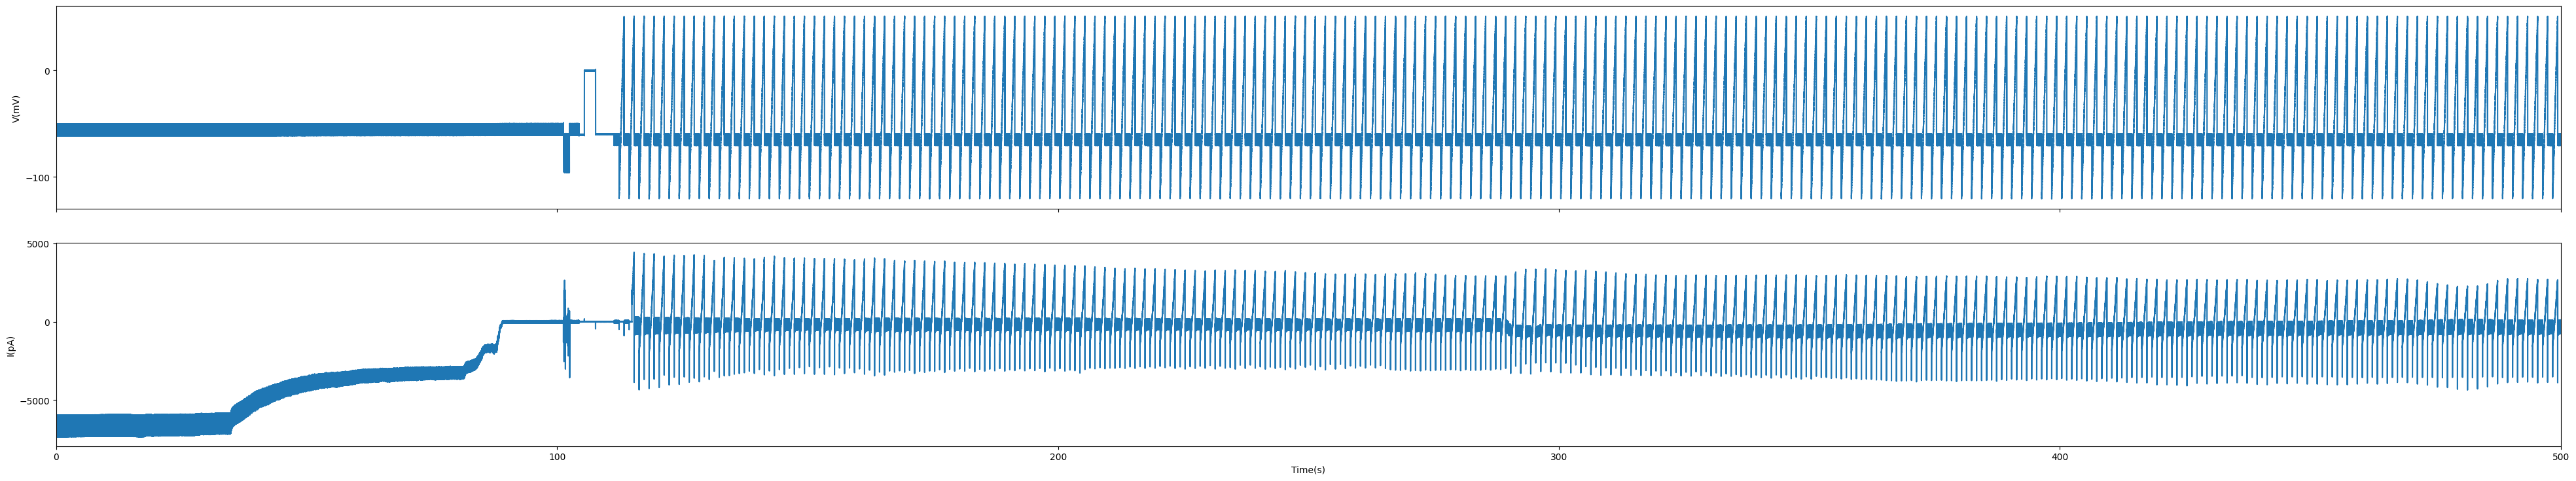

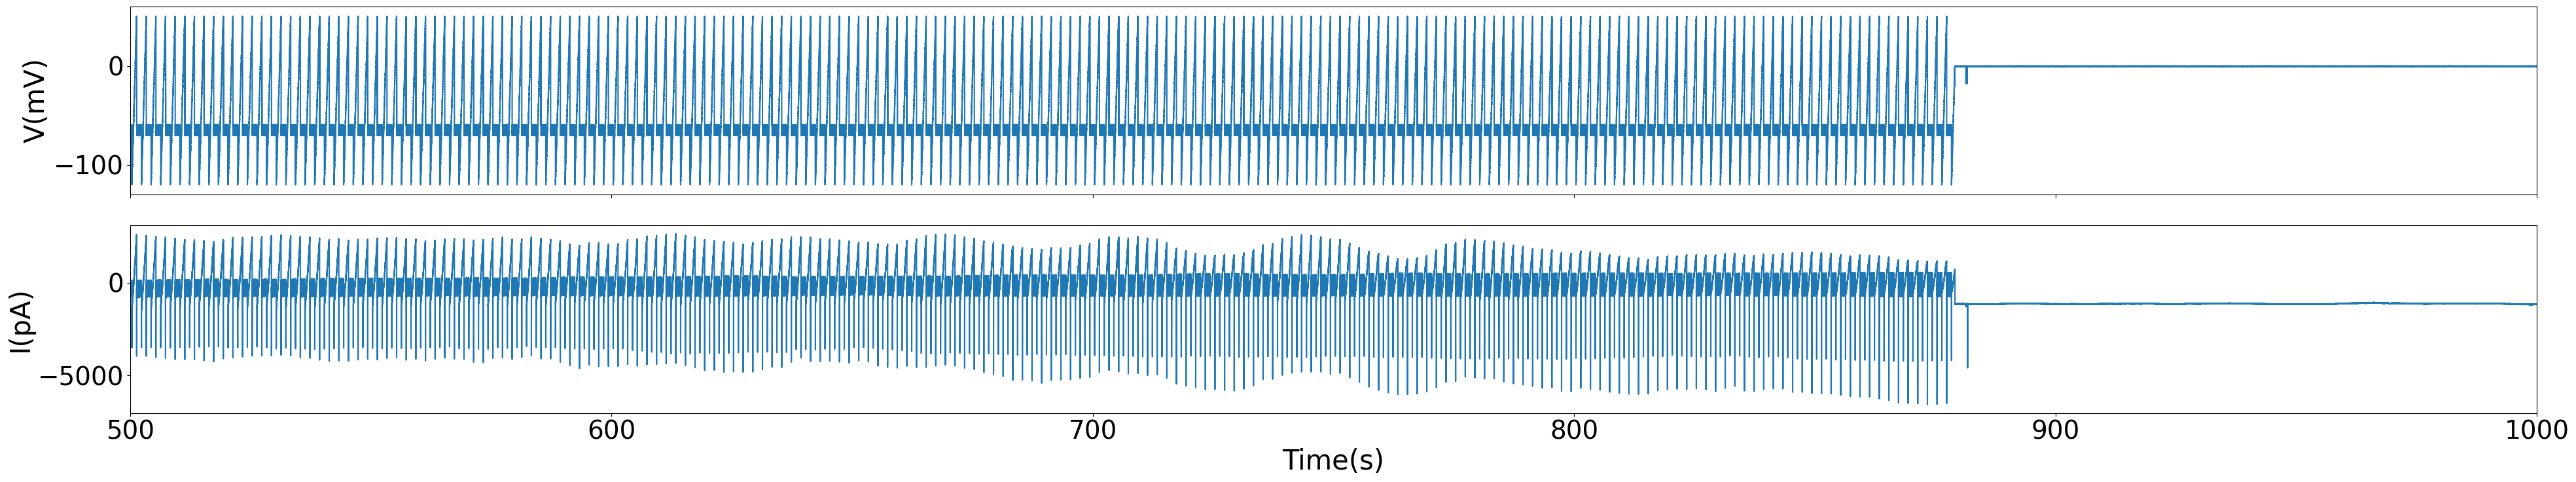

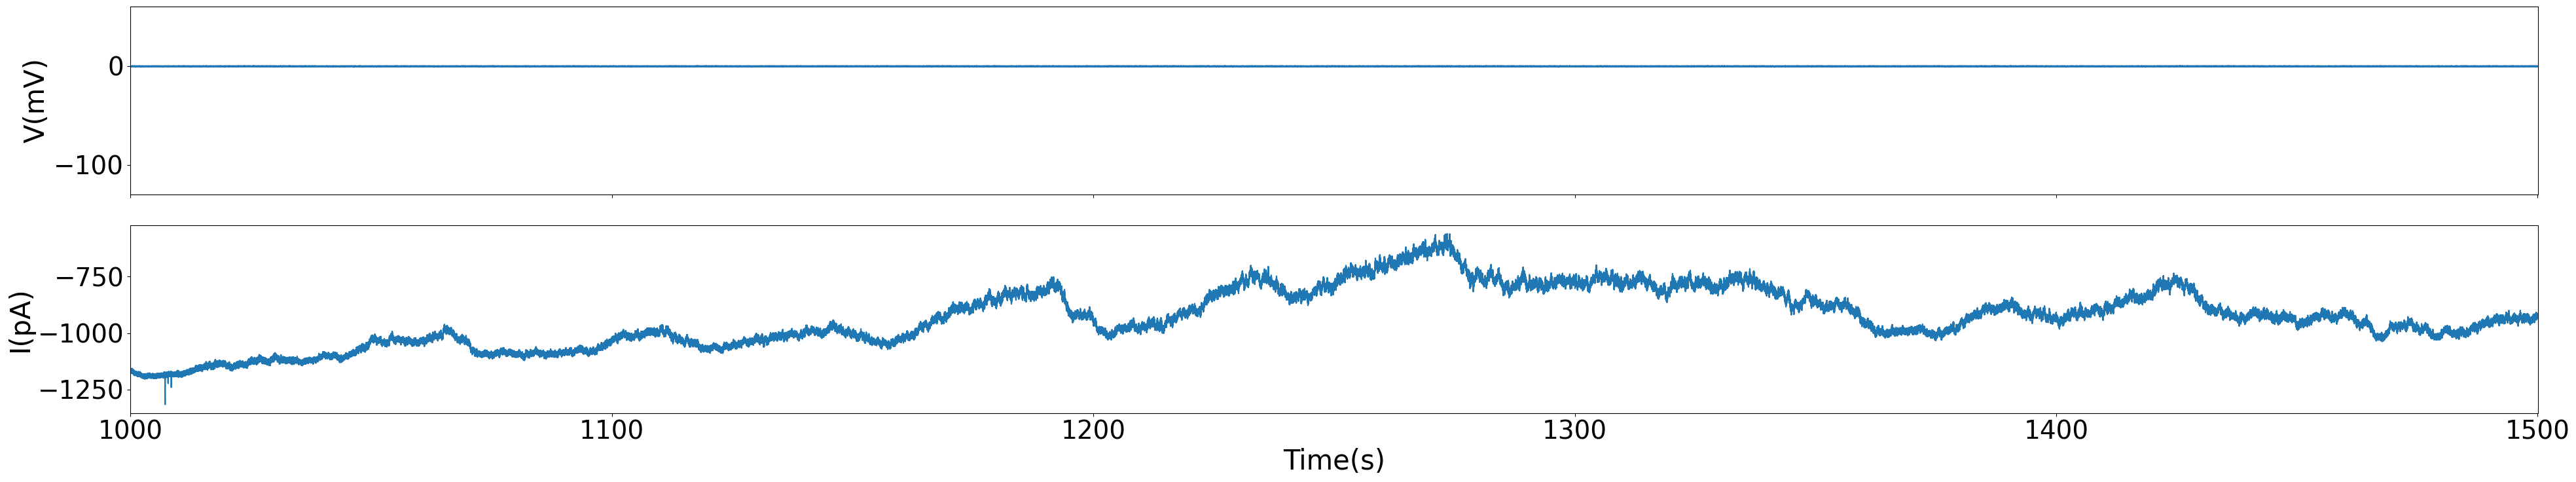

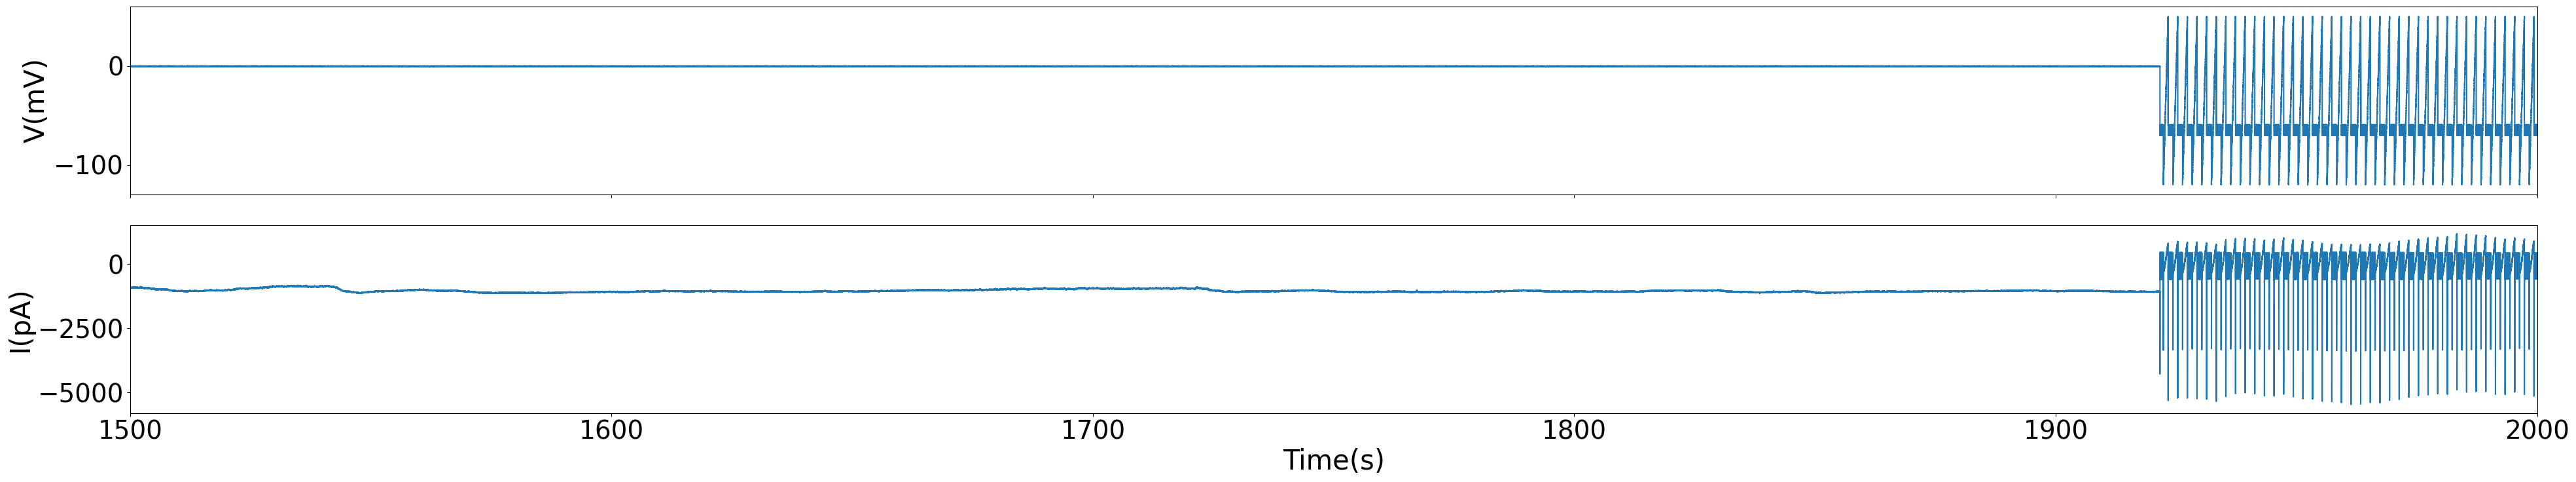

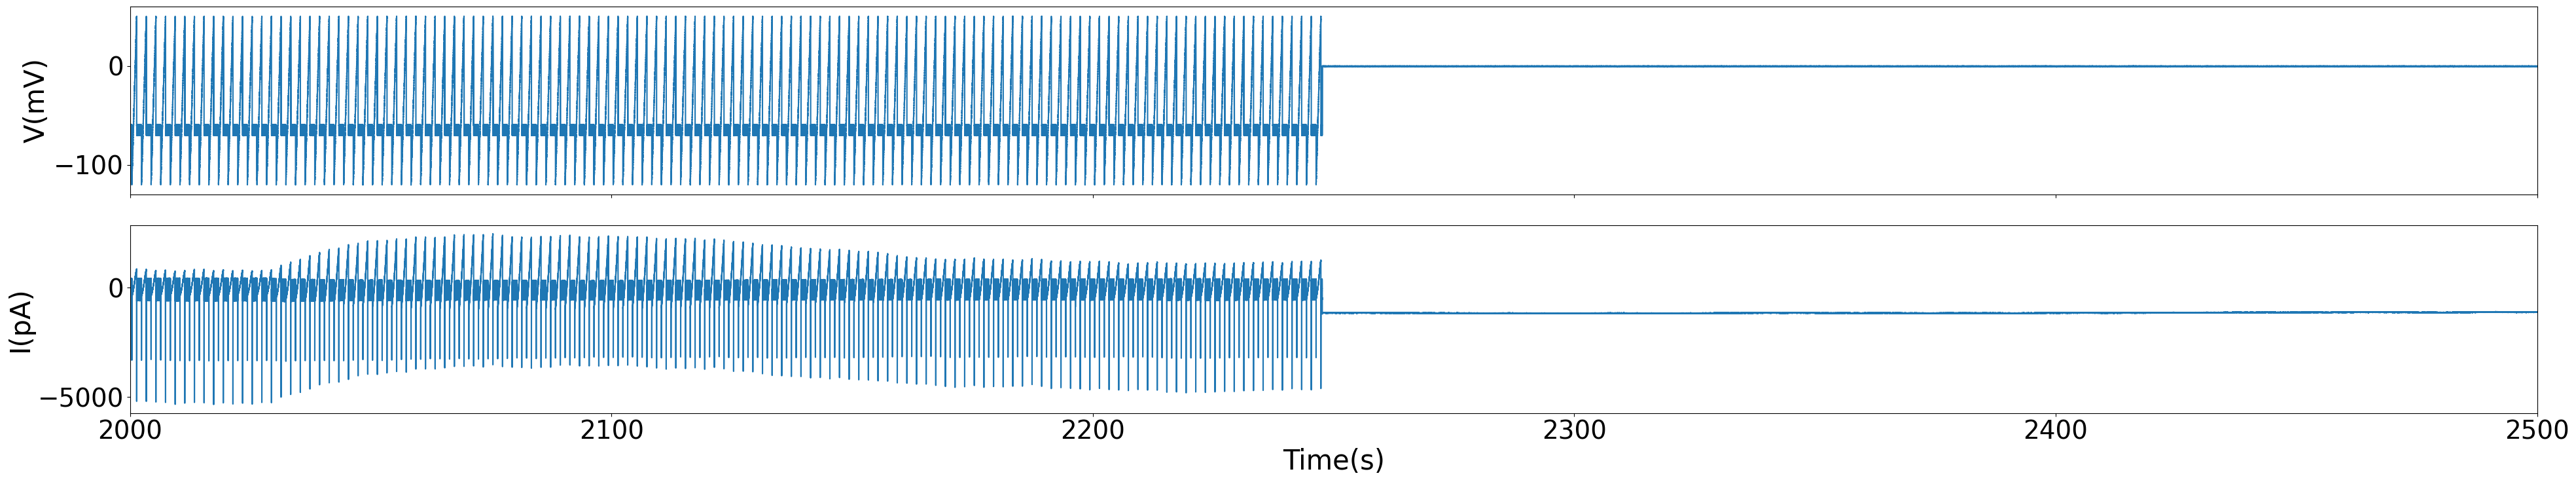

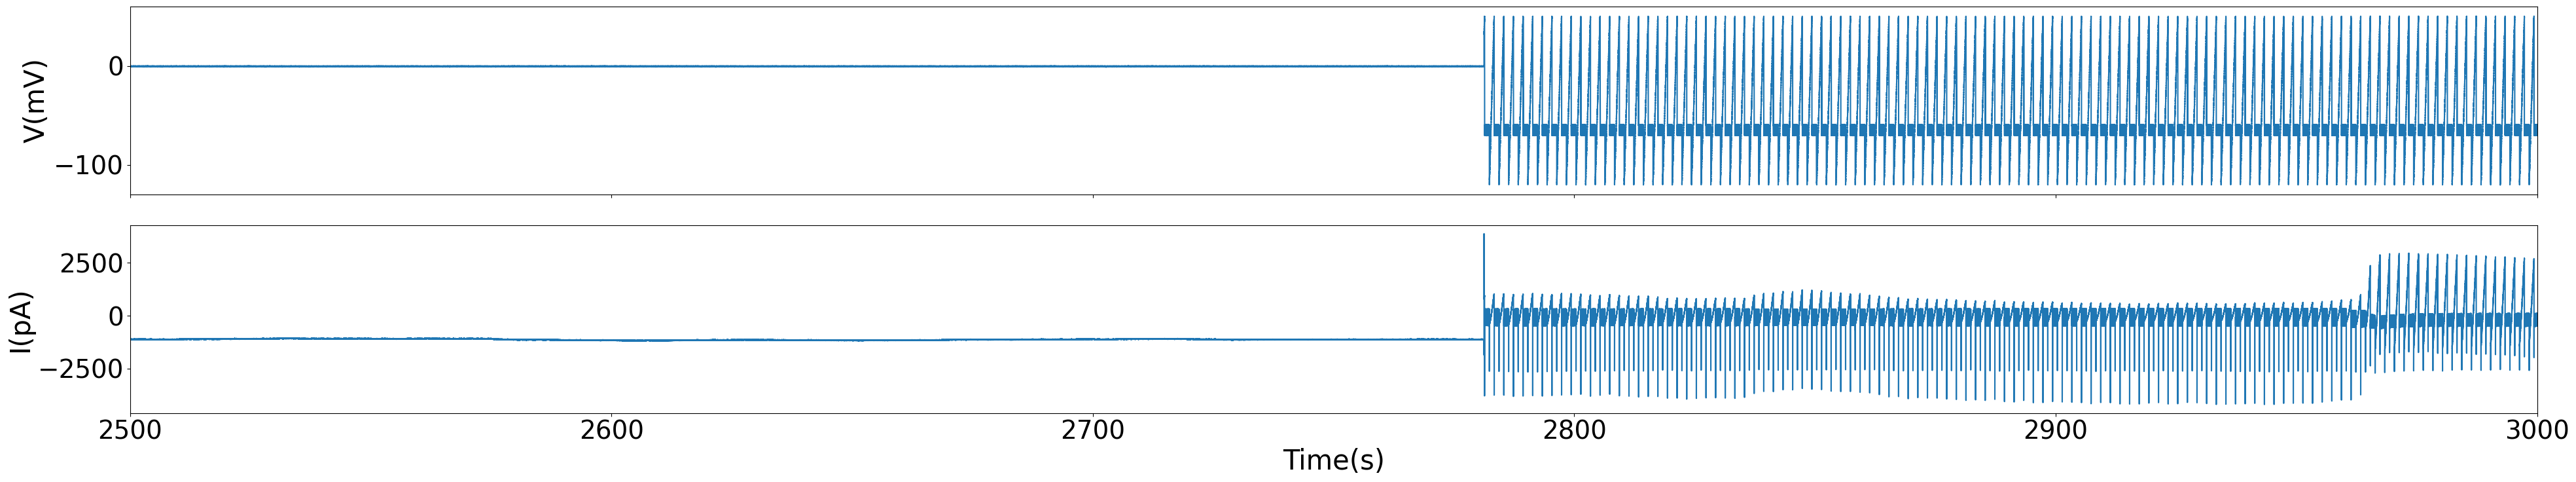

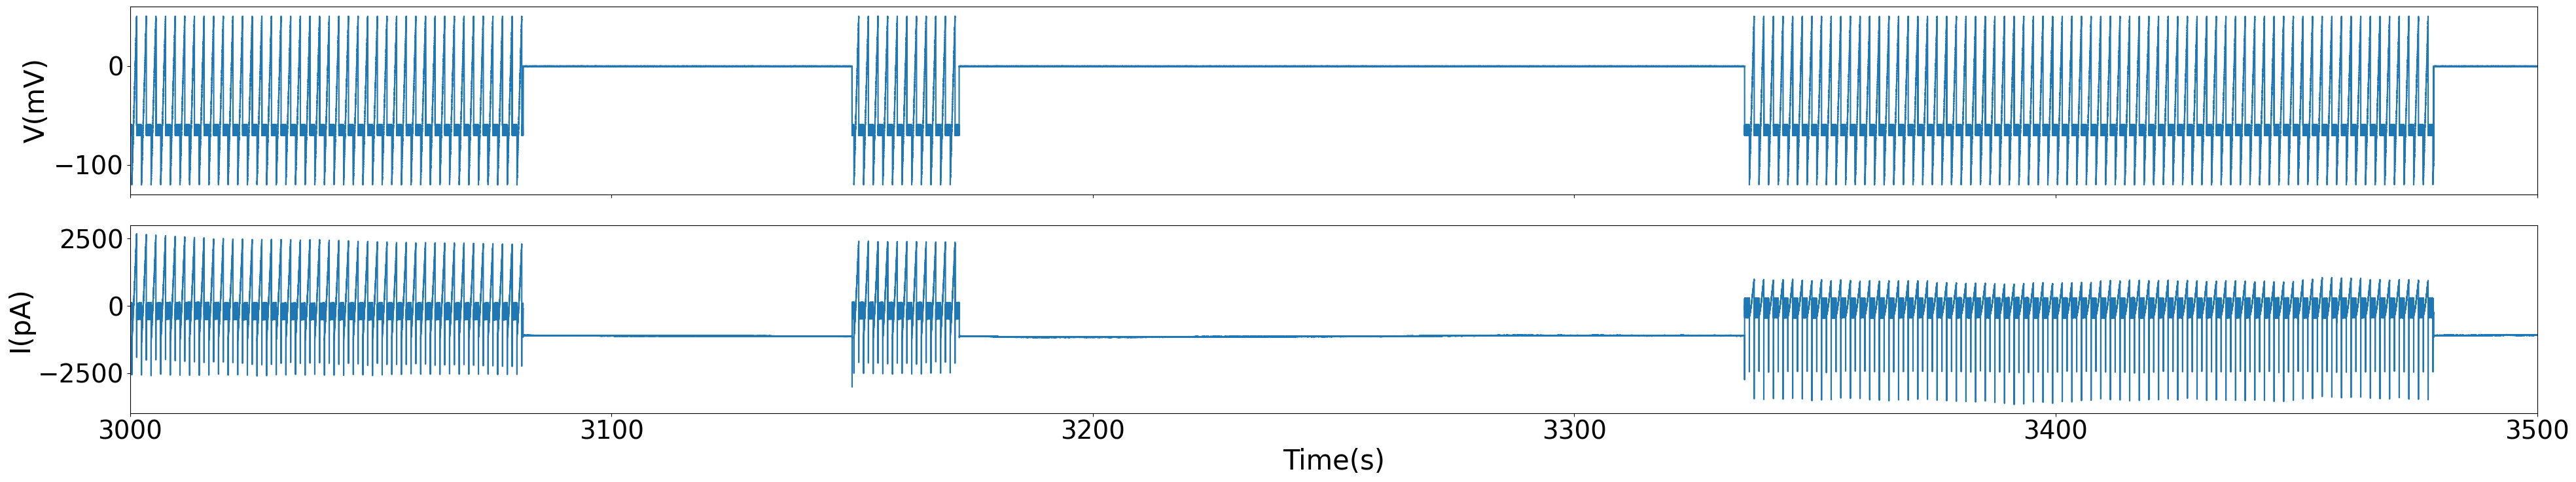

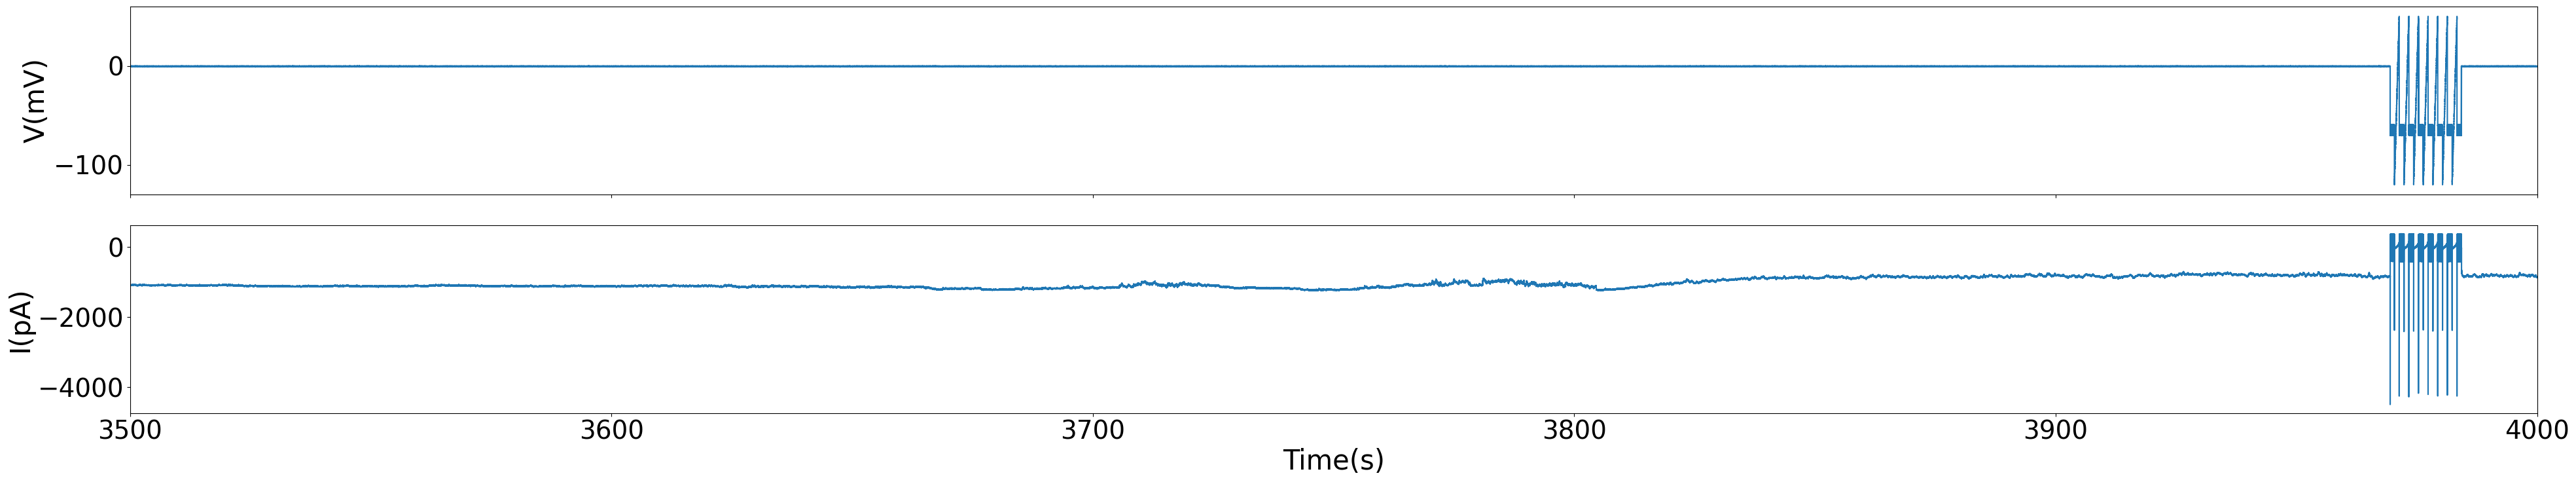

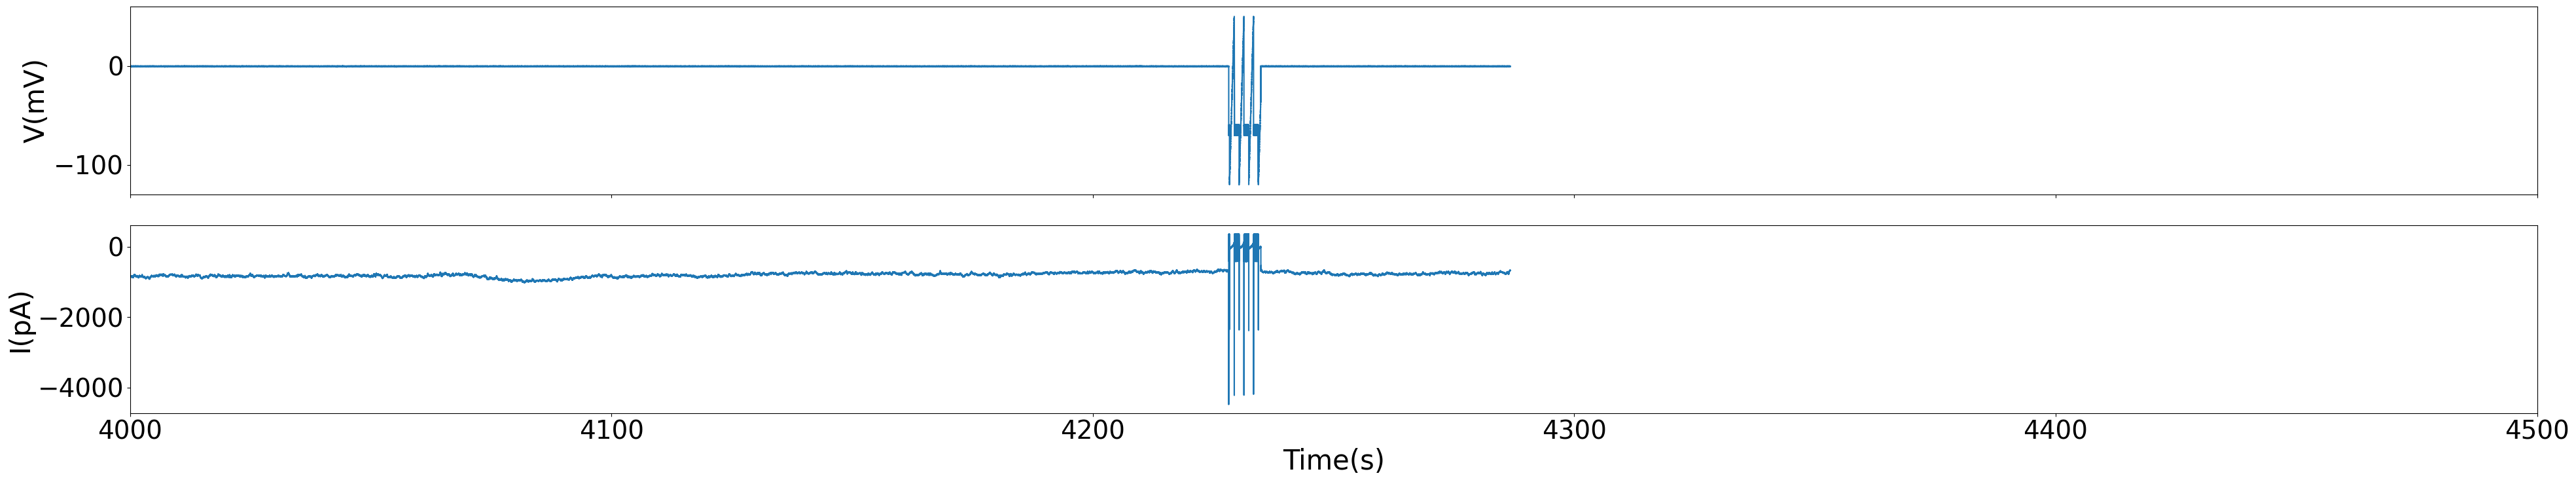

In [6]:
import math
n = math.ceil(times[-1]/500)
SMALL_SIZE = 28
MEDIUM_SIZE = 30
BIGGER_SIZE = 32
for i in range(n):
    fig, axs = plt.subplots(2, 1, sharex=True, figsize = (40,8))
    t_min = i*500
    t_max = (i+1)*500
    axs[0].plot(times[(times>=t_min)&(times<t_max)], V_vc['signal'][(times>=t_min)&(times<t_max)])
    axs[0].set_ylim(-130,60)
    axs[0].set_ylabel('V(mV)')
    #axs[0].set_xlim(times.min(), times.max())
    axs[0].set_xlim(t_min,t_max)
    axs[1].plot(times[(times>=t_min)&(times<t_max)], I_vc['signal'][(times>=t_min)&(times<t_max)])

    axs[1].set_ylabel('I(pA)')
    axs[1].set_xlabel('Time(s)')

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    #plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    fig.tight_layout()
    plt.show()

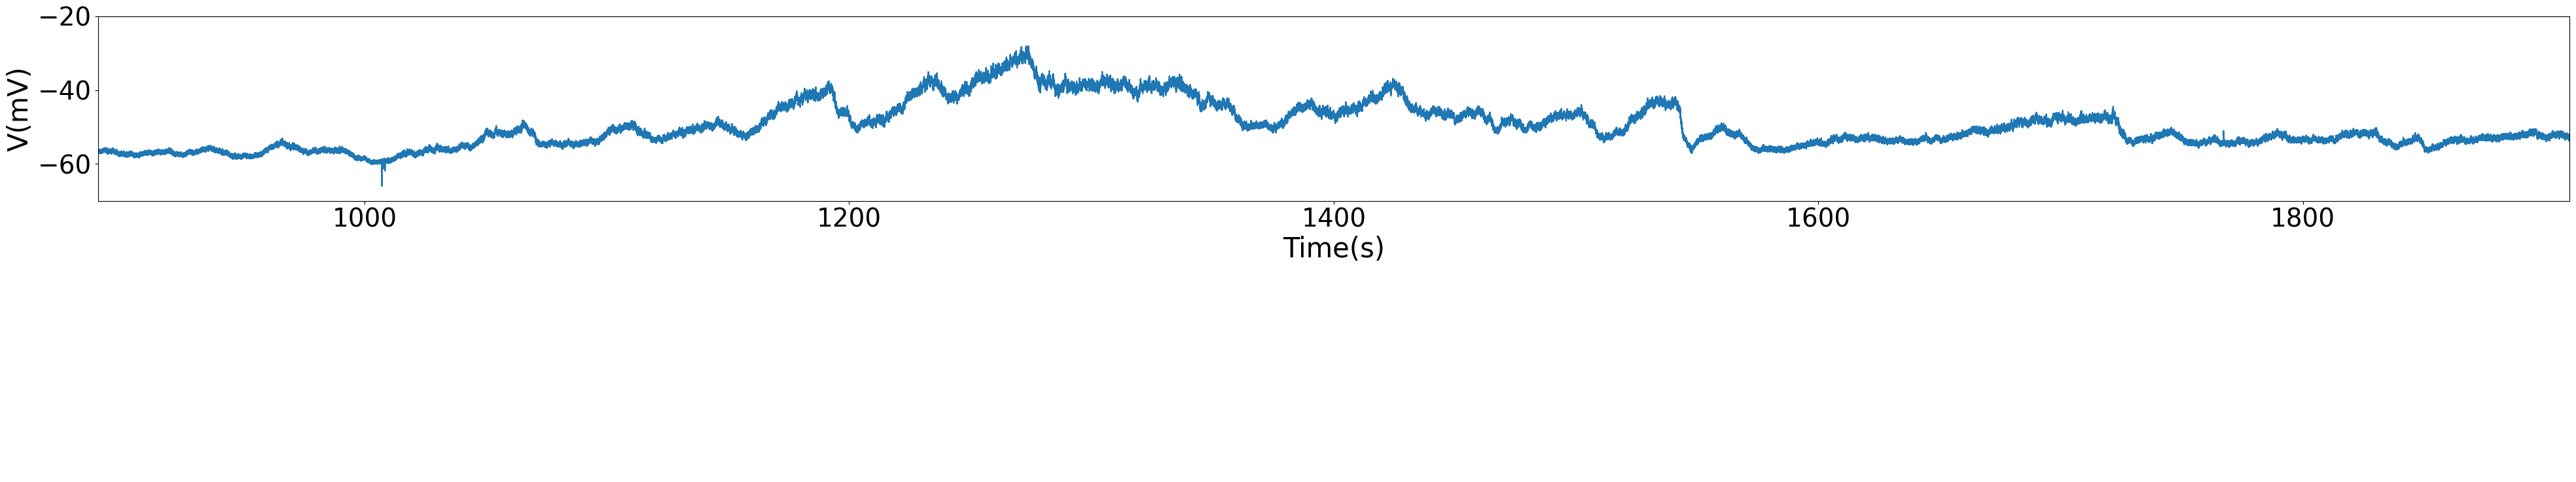

In [39]:
fig, axs = plt.subplots(2, 1, sharex=False, figsize = (40,8))
t_min = 890
t_max = 1910
axs[0].plot(times[(times>=t_min)&(times<t_max)], V_cc['signal'][(times>=t_min)&(times<t_max)])
axs[0].set_ylim(-70,-20)
axs[0].set_ylabel('V(mV)')
#axs[0].set_xlim(times.min(), times.max())
axs[0].set_xlim(t_min,t_max)
axs[0].set_xlabel('Time(s)')
axs[0].axvline(x=1009.7,ymin = -70, ymax = -20,c = 'black',ls = '-',lw = 2)
#axs[1].plot(times[(times>=t_min)&(times<t_max)], I_cc['signal'][(times>=t_min)&(times<t_max)])

#axs[1].set_ylabel('I(pA)')
#axs[1].set_xlabel('Time(s)')
axs[1].axis('off')

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig.tight_layout()
plt.show()

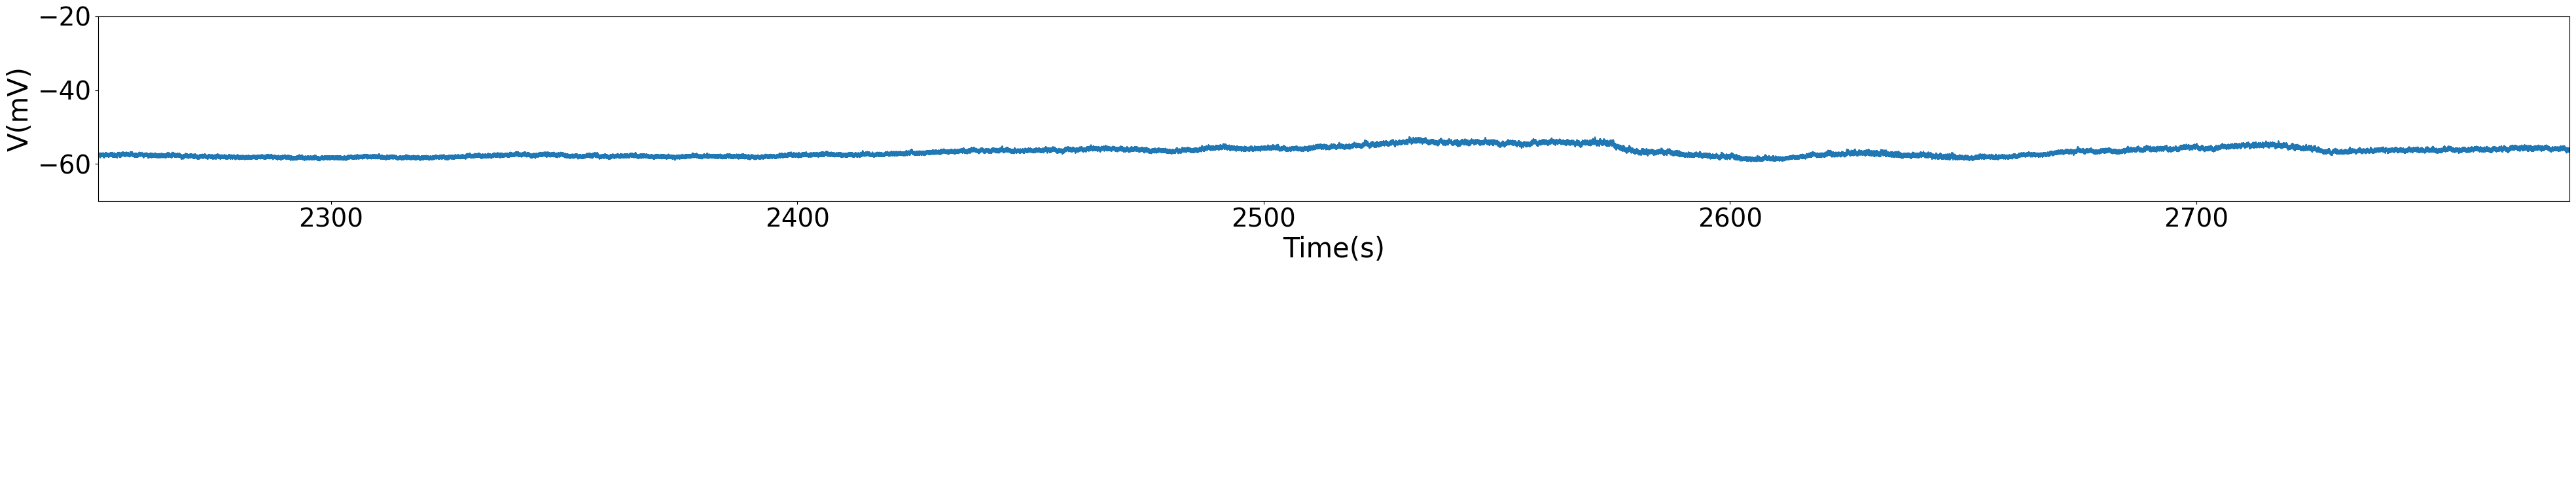

In [33]:
fig, axs = plt.subplots(2, 1, sharex=False, figsize = (40,8))
t_min = 2250
t_max = 2780
axs[0].plot(times[(times>=t_min)&(times<t_max)], V_cc['signal'][(times>=t_min)&(times<t_max)])
axs[0].set_ylim(-70,-20)
axs[0].set_ylabel('V(mV)')
#axs[0].set_xlim(times.min(), times.max())
axs[0].set_xlim(t_min,t_max)
axs[0].set_xlabel('Time(s)')
#axs[1].plot(times[(times>=t_min)&(times<t_max)], I_cc['signal'][(times>=t_min)&(times<t_max)])

#axs[1].set_ylabel('I(pA)')
#axs[1].set_xlabel('Time(s)')
axs[1].axis('off')

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig.tight_layout()
plt.show()

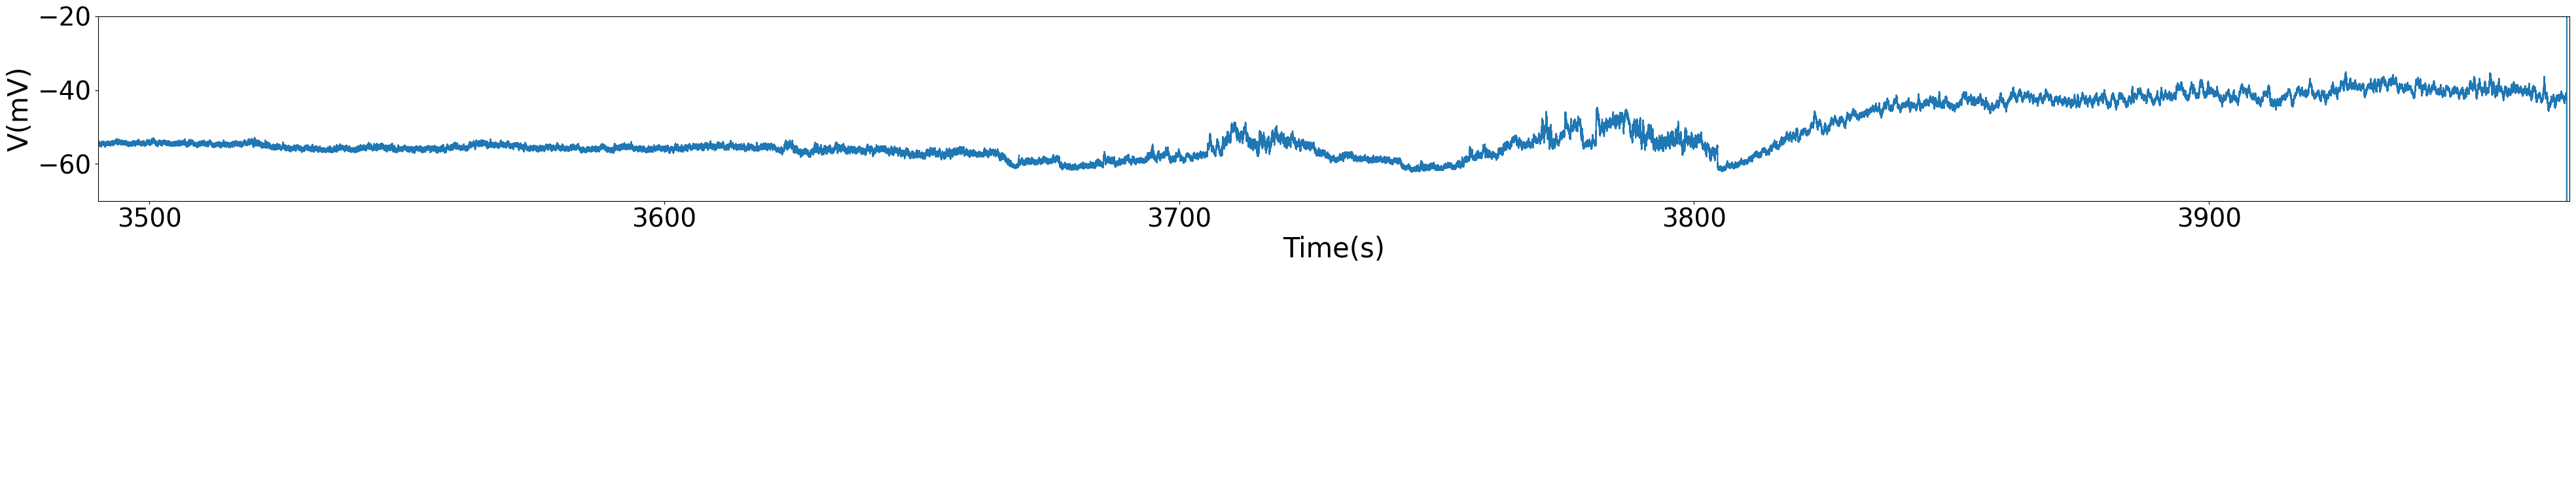

In [40]:
fig, axs = plt.subplots(2, 1, sharex=False, figsize = (40,8))
t_min = 3490
t_max = 3970
axs[0].plot(times[(times>=t_min)&(times<t_max)], V_cc['signal'][(times>=t_min)&(times<t_max)])
axs[0].set_ylim(-70,-20)
axs[0].set_ylabel('V(mV)')
#axs[0].set_xlim(times.min(), times.max())
axs[0].set_xlim(t_min,t_max)
axs[0].set_xlabel('Time(s)')
#axs[1].plot(times[(times>=t_min)&(times<t_max)], I_cc['signal'][(times>=t_min)&(times<t_max)])

#axs[1].set_ylabel('I(pA)')
#axs[1].set_xlabel('Time(s)')
axs[1].axis('off')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig.tight_layout()
plt.show()

In [15]:
#index = 54
data_dir = Path(save_dir,'_'.join(df.trial_string[index].split('_')[-3:]) )
data_dir

WindowsPath('R:/home/firefly_link/468_patch_clamp/results_profiles/20231104_slip4_cell1')

In [16]:
t_start = 115.92
t_ttx = 877.86

t_initial = times[(V<-120)&(times>t_start)][0]


t_before = np.arange(t_initial,t_ttx,2)


Vs_before = []
Is_before = []


for t in t_before:
    Vs_before.append(V[(times>=t)&(times<t+0.999)])
    Is_before.append(I[(times>=t)&(times<t+0.999)])
    

In [18]:
t_after_1_initial = times[(V<-120)&(times>1922.05)][0]

t_after_1 = np.arange(t_after_1_initial,2245.92,2)
Vs_after_1 = []
Is_after_1 = []
for t in t_after_1:
    Vs_after_1.append(V[(times>=t)&(times<t+0.999)])
    Is_after_1.append(I[(times>=t)&(times<t+0.999)])

In [20]:
t_after_2_initial = times[(V<-120)&(times>2781.79)][0]

t_after_2 = np.arange(t_after_2_initial,3081.65,2)
Vs_after_2 = []
Is_after_2 = []
for t in t_after_2:
    Vs_after_2.append(V[(times>=t)&(times<t+0.999)])
    Is_after_2.append(I[(times>=t)&(times<t+0.999)])

In [21]:
g_before = []
for i in range(len(Is_before)):
    g_before.append((Is_before[i][-1]-Is_before[i][0])/(Vs_before[i][-1]-Vs_before[i][0]))
g_after_1 = []
for i in range(len(Is_after_1)):
    g_after_1.append((Is_after_1[i][-1]-Is_after_1[i][0])/(Vs_after_1[i][-1]-Vs_after_1[i][0]))
g_after_2 = []
for i in range(len(Is_after_2)):
    g_after_2.append((Is_after_2[i][-1]-Is_after_2[i][0])/(Vs_after_2[i][-1]-Vs_after_2[i][0]))

In [24]:
np.save(Path(data_dir,'Conductance_before_ttx.npy'),g_before)
np.save(Path(data_dir,'Conductance_after_ttx.npy'),g_after_1+g_after_2)
np.save(Path(data_dir,'times_before_ttx.npy'),t_before)
np.save(Path(data_dir,'times_after_ttx.npy'),list(t_after_1)+list(t_after_2))

In [26]:
Vs = Vs_before + Vs_after_1 + Vs_after_2
Is = Is_before + Is_after_1 + Is_after_2

693


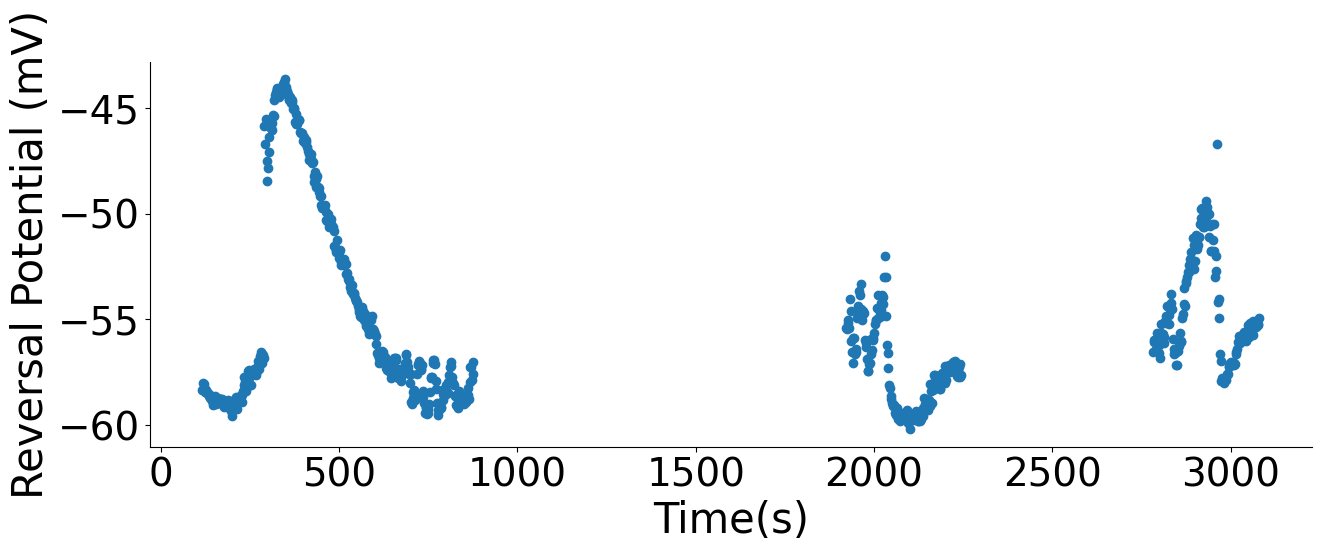

In [27]:
t_initials = list(t_before) + list(t_after_1)+list(t_after_2)
V_rev = []
for i in range(len(Vs)):
    if len(Vs[i][Is[i] == 0]) != 0:
        V_rev.append(Vs[i][Is[i] == 0].mean())
    else:
        min_index = min(range(len(Is[i])), key=lambda j: abs(Is[i][j]-0))
        V_rev.append(Vs[i][min_index])

print(len(V_rev))
fig, ax = plt.subplots(figsize = (15,5))
ax.scatter(t_initials,V_rev)
#ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
#ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.xlabel('Time(s)')
plt.ylabel('Reversal Potential (mV)')
plt.show()
np.save(Path(data_dir,'V_rev.npy'),V_rev)
np.save(Path(data_dir,'t_all.npy'),t_initials)